In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch import autograd
import torch.nn.functional as F

In [2]:
images = np.load("images.npy")
labels = np.load("labels.npy")

val_entries = np.random.choice(len(labels), size=int(len(labels)*0.1), replace=False)

flat_images = np.zeros((len(images),len(images[0])*len(images[0][0])))
for i in range(0, len(images)-1):
    flat_images[i] = images[i].flatten()
    
not_val = [x for x in range(len(flat_images)) if x not in val_entries]
    
train_images = flat_images[not_val]
train_labels = labels[not_val]
val_images = flat_images[val_entries]
val_labels = labels[val_entries]

In [3]:
HEIGHT = 26
WIDTH = 26
NUM_CLASSES = 5
D_H = 100
NUM_OPT_STEPS = 5000

In [4]:
class TwoLayerNN(torch.nn.Module):
    
    def __init__(self):
        super(TwoLayerNN, self).__init__()
        self.linear1 = torch.nn.Linear(HEIGHT * WIDTH, D_H)
        self.linear2 = torch.nn.Linear(D_H, NUM_CLASSES)
        
    def forward(self, x):
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred

In [5]:
model = TwoLayerNN()

In [6]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [7]:
def train(batch_size):
    i = np.random.choice(train_images.shape[0], size=batch_size, replace=False)
    x = torch.from_numpy(train_images[i].astype(np.float32))
    y = torch.from_numpy(train_labels[i].astype(np.int))
    y_hat_ = model(x)
    loss = F.cross_entropy(y_hat_, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss.item()

In [8]:
def accuracy(y, y_hat):
    return (y == y_hat).astype(np.float).mean()

In [9]:
def approx_train_accuracy():
    i = np.random.choice(train_images.shape[0], size=1000, replace=False)
    x = torch.from_numpy(train_images[i].astype(np.float32))
    y = torch.from_numpy(train_labels[i].astype(np.int))
    y_hat = torch.from_numpy(labels[i].astype(np.int))
    for spot, val in enumerate(x):
        y_hat[spot] = torch.max(model(val), 0)[1]
    return accuracy(y.numpy(), y_hat.numpy())

In [10]:
def val_accuracy():
    x = torch.from_numpy(val_images.astype(np.float32))
    y = torch.from_numpy(val_labels.astype(np.int))
    y_hat = torch.from_numpy(val_labels.astype(np.int))
    for spot, val in enumerate(x):
        y_hat[spot] = torch.max(model(val), 0)[1]
    return accuracy(y.numpy(), y_hat.numpy())

In [11]:
train_accs, val_accs, steps = [], [], []
for i in range(NUM_OPT_STEPS):
    train(1)
    if i % 100 == 0:
        train_accs.append(approx_train_accuracy())
        val_accs.append(val_accuracy())
        steps.append(i)
        print("%6d %5.2f %5.2f" % (i, train_accs[-1], val_accs[-1]))

     0  0.24  0.21
   100  0.50  0.50
   200  0.52  0.52
   300  0.58  0.60
   400  0.49  0.51
   500  0.52  0.51
   600  0.51  0.53
   700  0.53  0.54
   800  0.51  0.51
   900  0.57  0.58
  1000  0.55  0.53
  1100  0.49  0.51
  1200  0.46  0.48
  1300  0.55  0.56
  1400  0.56  0.52
  1500  0.57  0.55
  1600  0.56  0.58
  1700  0.53  0.53
  1800  0.55  0.58
  1900  0.57  0.56
  2000  0.59  0.60
  2100  0.59  0.60
  2200  0.52  0.53
  2300  0.62  0.60
  2400  0.58  0.59
  2500  0.53  0.56
  2600  0.56  0.55
  2700  0.51  0.55
  2800  0.55  0.53
  2900  0.48  0.51
  3000  0.51  0.51
  3100  0.59  0.56
  3200  0.48  0.49
  3300  0.59  0.58
  3400  0.57  0.57
  3500  0.55  0.56
  3600  0.56  0.55
  3700  0.58  0.59
  3800  0.58  0.59
  3900  0.63  0.62
  4000  0.55  0.55
  4100  0.58  0.60
  4200  0.63  0.63
  4300  0.62  0.61
  4400  0.65  0.65
  4500  0.60  0.63
  4600  0.66  0.65
  4700  0.56  0.58
  4800  0.63  0.63
  4900  0.62  0.63


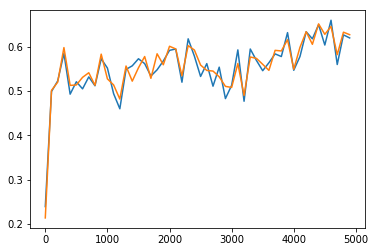

In [12]:
plt.plot(steps, train_accs)
plt.plot(steps, val_accs)

In [13]:
model.linear1.reset_parameters()
model.linear2.reset_parameters()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [14]:
train_accs, val_accs, steps = [], [], []
for i in range(NUM_OPT_STEPS):
    train(10)
    if i % 100 == 0:
        train_accs.append(approx_train_accuracy())
        val_accs.append(val_accuracy())
        steps.append(i)
        print("%6d %5.2f %5.2f" % (i, train_accs[-1], val_accs[-1]))

     0  0.24  0.24
   100  0.65  0.63
   200  0.65  0.65
   300  0.66  0.67
   400  0.67  0.67
   500  0.69  0.70
   600  0.72  0.68
   700  0.71  0.70
   800  0.66  0.68
   900  0.69  0.69
  1000  0.72  0.71
  1100  0.70  0.72
  1200  0.70  0.70
  1300  0.70  0.71
  1400  0.72  0.70
  1500  0.71  0.71
  1600  0.72  0.70
  1700  0.73  0.72
  1800  0.74  0.73
  1900  0.75  0.70
  2000  0.76  0.73
  2100  0.74  0.74
  2200  0.73  0.75
  2300  0.76  0.75
  2400  0.70  0.69
  2500  0.78  0.74
  2600  0.73  0.75
  2700  0.75  0.76
  2800  0.72  0.72
  2900  0.74  0.75
  3000  0.75  0.76
  3100  0.74  0.74
  3200  0.76  0.73
  3300  0.78  0.76
  3400  0.76  0.76
  3500  0.76  0.75
  3600  0.79  0.76
  3700  0.77  0.75
  3800  0.76  0.76
  3900  0.79  0.75
  4000  0.77  0.76
  4100  0.77  0.76
  4200  0.70  0.71
  4300  0.74  0.74
  4400  0.76  0.76
  4500  0.79  0.76
  4600  0.71  0.72
  4700  0.78  0.75
  4800  0.78  0.75
  4900  0.75  0.75


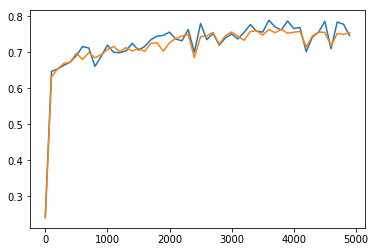

In [15]:
plt.plot(steps, train_accs)
plt.plot(steps, val_accs)

In [35]:
model.linear1.reset_parameters()
model.linear2.reset_parameters()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
train_accs, val_accs, steps = [], [], []
for i in range(10000):
    train(100)
    if i % 100 == 0:
        train_accs.append(approx_train_accuracy())
        val_accs.append(val_accuracy())
        steps.append(i)
        print("%6d %5.2f %5.2f" % (i, train_accs[-1], val_accs[-1]))

     0  0.24  0.25
   100  0.58  0.59
   200  0.64  0.65
   300  0.69  0.67
   400  0.68  0.68
   500  0.69  0.69
   600  0.69  0.69
   700  0.70  0.70
   800  0.72  0.70
   900  0.74  0.71
  1000  0.74  0.73
  1100  0.74  0.74
  1200  0.72  0.74
  1300  0.78  0.74
  1400  0.77  0.75
  1500  0.76  0.76
  1600  0.78  0.76
  1700  0.77  0.77
  1800  0.78  0.77
  1900  0.78  0.77
  2000  0.80  0.77
  2100  0.81  0.78
  2200  0.82  0.78
  2300  0.82  0.78
  2400  0.80  0.78
  2500  0.83  0.79
  2600  0.80  0.79
  2700  0.84  0.79
  2800  0.82  0.79
  2900  0.84  0.80
  3000  0.81  0.80
  3100  0.82  0.80
  3200  0.82  0.79
  3300  0.84  0.79
  3400  0.87  0.80
  3500  0.84  0.80
  3600  0.84  0.80
  3700  0.86  0.80
  3800  0.86  0.80
  3900  0.86  0.81
  4000  0.84  0.81
  4100  0.84  0.80
  4200  0.84  0.81
  4300  0.86  0.81
  4400  0.85  0.81
  4500  0.83  0.81
  4600  0.85  0.81
  4700  0.85  0.81
  4800  0.86  0.81
  4900  0.88  0.81
  5000  0.85  0.81
  5100  0.86  0.81
  5200  0.87

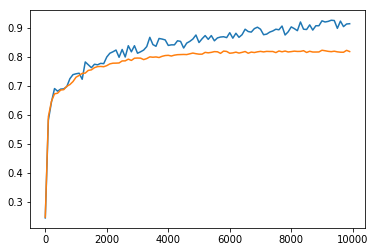

In [36]:
plt.plot(steps, train_accs)
plt.plot(steps, val_accs)